# Interaction with the World Homework (#3)
Python Computing for Data Science (c) J Bloom, UC Berkeley, 2016

# 1) Monty: The Python Siri

Let's make a Siri-like program with the following properties:
   - record your voice command
   - use a webservice to parse that sound file into text
   - based on what the text, take three different types of actions:
       - send an email to yourself
       - do some math
       - tell a joke

So for example, if you say "Monty: email me with subject hello and body goodbye", it will email you with the appropriate subject and body. If you say "Monty: tell me a joke" then it will go to the web and find a joke and print it for you. If you say, "Monty: calculate two times three" it should response with printing the number 6.

Hint: you can use speed-to-text apps like Houndify to return the text (but not do the actions). You'll need to sign up for a free API and then follow documentation instructions for using the service within Python. 

In [1]:
import pyaudio
import seaborn

In [2]:
import wavio

In [3]:
import houndify

In [4]:
!ls

README.md            input-siri3.wav      sample_stdin.py
ThinkDSP             klikey               sample_text.py
__pycache__          klikey.py            sample_wave.py
homework.ipynb       klikey2.py           scipy2015_demo.ipynb
houndify.py          new_file.ogg         sound.py
hw3_sound_files.zip  pySHSpeex            sound_files
input-siri.wav       return.txt           test_audio
input-siri2.wav      returned.txt


#### First, we record an audio query

In [306]:
### How I am recording my audio query
chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "input-siri3.wav"
p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input = True,
    frames_per_buffer = chunk)
all = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk)
    all.append(data)
print("* done recording")
stream.close()
p.terminate()

* done recording


In [21]:
def record():
    ### How I am recording my audio query
    chunk = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 16000
    RECORD_SECONDS = 5
    WAVE_OUTPUT_FILENAME = "input-siri3.wav"
    p = pyaudio.PyAudio()
    stream = p.open(format = FORMAT,
        channels = CHANNELS,
        rate = RATE,
        input = True,
        frames_per_buffer = chunk)
    all = []
    for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
        data = stream.read(chunk)
        all.append(data)
    print("* done recording")
    stream.close()
    p.terminate()

In [307]:
audio = wave.open("input-siri3.wav")
audio.getsampwidth()

2

In [308]:
audio.getframerate()

16000

In [309]:
p.get_sample_size(FORMAT)

2

In [310]:
import wave
data = b"".join(all)
wf = wave.open(WAVE_OUTPUT_FILENAME, "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(data)
wf.close()

In [311]:
wf

In [5]:
!open input-siri3.wav

In [159]:
!ls

README.md            input-siri.wav       sample_text.py
ThinkDSP             klikey               sample_wave.py
__pycache__          klikey.py            scipy2015_demo.ipynb
homework.ipynb       new_file.ogg         sound.py
houndify.py          pySHSpeex            sound_files
hw3_sound_files.zip  sample_stdin.py      test_audio


In [6]:
import klikey

In [20]:
!$filename = returned.txt
!./sample_wave.py $klikey.clientId $klikey.clientKey $filename > returned.txt

/bin/sh: =: command not found


In [22]:
def parser(filename):
    '''
    Description: 
    Input: filename of .wav file
    The function checks for the key words, and conducts tasks based on the result
    Output: 3 actions
    '''
    #filename = "input-siri3.wav"
    !./sample_wave.py $klikey.clientId $klikey.clientKey $filename > returned.txt
    if 'email' in open('returned.txt').read():
        print("email found, time to send an email")
        sendEmails()
    elif 'joke' in open('returned.txt').read(): 
        print('joke found, find him a joke')
    else:
        print("do some math (aka query google!)")
        query=math_finder()
        

In [23]:
parser("input-siri3.wav")

do some math (aka query google!)


In [11]:
!head -50 returned.txt

============== input-siri3.wav ===================
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: 
Partial transcript: three
Partial transcript: three
Partial transcript: three
Partial transcript: three
Partial transcript: three
Partial transcript: three
Partial transcript: three plus
Partial transcript: three plus
Partial transcript: three plus
Partial transcript: three plus
Partial transcript: three plus for
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five
Partial transcript: three plus five plus
Partial transcript: three plus five plus
Partial transcript: three plus five plus
Partial transcript: three plus fiv

In [32]:
def math_finder():
    lst_line = None
    with open("returned.txt") as f:
        for line in f:
            #print(line)
            if 'Partial transcript: ' in line:
                lst_line = line
            #print(line)
    lst_line = lst_line.split(': ')[1]
    lst_line = lst_line.strip('\n')
    line = lst_line.replace(' ','+')
    return(line)
        
df = math_finder() 
df

'three+plus+five+plus+four'

In [28]:
import klikey2
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [26]:
def sendEmails():
    fromaddr = "kli09181990@gmail.com"
    toaddr = "kingofthesouth-kevinthegreat@hotmail.com"
    msg = MIMEMultipart()
    msg['From'] = fromaddr
    msg['To'] = toaddr
    msg['Subject'] = "Hi"
 
    body = "Bye"
    msg.attach(MIMEText(body, 'plain'))
 
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(fromaddr, klikey2.password)
    text = msg.as_string()
    server.sendmail(fromaddr, toaddr, text)
    server.quit()

In [329]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
 
 
fromaddr = "kli09181990@gmail.com"
toaddr = "kingofthesouth-kevinthegreat@hotmail.com"
msg = MIMEMultipart()
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = "Hi"
 
body = "Bye"
msg.attach(MIMEText(body, 'plain'))
 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(fromaddr, klikey2.password)
text = msg.as_string()
server.sendmail(fromaddr, toaddr, text)
server.quit()

(221, b'2.0.0 closing connection gm1sm421824pac.2 - gsmtp')

In [30]:
sendEmails()

In [31]:
parser('input-siri3.wav') # Basic Test Case

do some math (aka query google!)


In [78]:
base_query = "https://www.google.com.hk/"

In [34]:
base_query = "https://google.com/search?"

In [56]:
base_query = 'http://ajax.googleapis.com/ajax/services/search/web?v=1.0&%s'

In [ ]:
letters = "qwertyuioplkjhgfdsazxcvbnm"
boy_names = []
for n in string.ascii_uppercase[:26]:
    url = "http://nameberry.com/search/boys_names/" + n
    response = urlopen(url)
    html = response.read()
    response.close()
    soup = BeautifulSoup(html,"html.parser")
    items = soup.findAll("li", class_="name_in_list")
    for item in items:
        if len(item.findAll("a")) == 1:
            boy_names.append(item.a.get_text())

In [50]:
!ls 

BeautifulSoup.py     input-siri2.wav      sample_wave.py
README.md            input-siri3.wav      scipy2015_demo.ipynb
ThinkDSP             klikey               search.py
__init__.py          klikey.py            sound.py
__pycache__          klikey2.py           sound_files
browser.py           new_file.ogg         sponsoredlinks.py
googlesets.py        pySHSpeex            test_audio
homework.ipynb       return.txt           translate.py
houndify.py          returned.txt         xgoogle
hw3_sound_files.zip  sample_stdin.py
input-siri.wav       sample_text.py


In [54]:
import search

SyntaxError: invalid syntax (search.py, line 124)

In [61]:
import google_api_key

In [80]:
url


'https://www.google.com.hk/'

In [40]:
url

'https://google.com/search?q=three+plus+five+plus+four'

In [37]:
items

[]

In [85]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
from bs4 import BeautifulSoup
url = base_query + "#q=three+plus+five+plus+four+hundred"
response = urlopen(url)
html = response.read()
response.close()
soup = BeautifulSoup(html,"html.parser")
items = soup.findAll("li", class_="name_in_list")

# 2) Write a program that identifies musical notes from sound (AIFF) files. 

  - Run it on the supplied sound files (12) and report your program’s results. 
  - Use the labeled sounds (4) to make sure it works correctly. The provided sound files contain 1-3 simultaneous notes from different organs.
  - Save copies of any example plots to illustrate how your program works.
  
  https://piazza.com/berkeley/fall2016/ay250/resources -> hw3_sound_files.zip

Hints: You’ll want to decompose the sound into a frequency power spectrum. Use a Fast Fourier Transform. Be care about “unpacking” the string hexcode into python data structures. The sound files use 32 bit data. Play around with what happens when you convert the string data to other integer sizes, or signed vs unsigned integers. Also, beware of harmonics.

In [33]:
!ls

ThinkDSP             hw3_sound_files.zip  sound.py
__pycache__          new_file.ogg         sound_files
homework.ipynb       scipy2015_demo.ipynb


In [114]:
import numpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [99]:
import pyaudio
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import os

In [100]:
import soundfile as sf 

In [238]:
sound_files = sorted([os.path.join("sound_files", x) \
                      for x in os.listdir("sound_files")])
sound_files

['sound_files/.DS_Store',
 'sound_files/1.aif',
 'sound_files/10.aif',
 'sound_files/11.aif',
 'sound_files/12.aif',
 'sound_files/2.aif',
 'sound_files/3.aif',
 'sound_files/4.aif',
 'sound_files/5.aif',
 'sound_files/6.aif',
 'sound_files/7.aif',
 'sound_files/8.aif',
 'sound_files/9.aif',
 'sound_files/A4_PopOrgan.aif',
 'sound_files/C4+A4_PopOrgan.aif',
 'sound_files/F3_PopOrgan.aif',
 'sound_files/F4_CathedralOrgan.aif']

In [246]:
def load(filename):
    """
    Input: an aif file
    Description: Load an audio file and average over channels. Returns the data as a
    numpy array and the sampling rate.
    Output: Data and Rate
    """
    (data, rate) = sf.read(filename)
    if data.ndim == 2:
        data = np.mean(data, axis=-1)
    # rate = sf.samplerate
    return data, rate


In [211]:
filename = sound_files[12]; filename

'sound_files/9.aif'

In [212]:
(data, rate) = sf.read(filename)
data.shape

(705600, 2)

In [213]:
data.shape

(705600, 2)

In [214]:
if data.shape[1] == 2:
        data = np.mean(data, axis=-1)
data

array([ -3.05175781e-05,  -1.52587891e-05,   7.62939453e-05, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [215]:
rate

44100

In [233]:
def plot_amplitude(data, rate):
    time = arange(data.size) 
    print(time.shape)
    time = time/float(rate)
    fig = plt.figure(figsize=(7, 4.5))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(time, data, 'b', linestyle="-")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Amplitude")
    ax1.set_xlim(min(time), max(time))

In [234]:
data.shape

(705600,)

In [235]:
time = arange(data.size) 
print(time.shape)

(705600,)


(705600,)


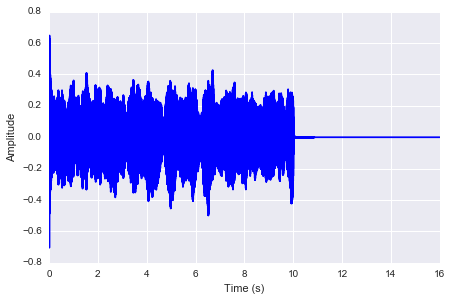

In [236]:
plot_amplitude(data, rate)

In [220]:
def time_to_freq_pow(data, rate):
    """
    Input: Data, Rate
    Description: Use FFT to convert to freq power spectrum
    Output: freq-power spectrum
    """
    n = 10000
    fft = np.fft.fft(data, n)[1:n/2]
    power = np.abs(fft) ** 2
    frequency = rate * np.fft.fftfreq(n)[1:n/2]

    return frequency, power


In [221]:
def power_plot(freq, power):
    plt.loglog(freq, power, basex=2, basey=2, color='b')
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.gcf()


/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


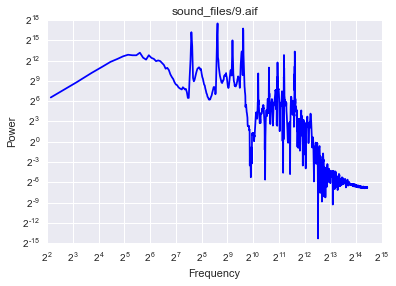

In [222]:
# plot frequency vs. power
freq, power = time_to_freq_pow(data, rate)
power_plot(freq, power)
plt.title(filename)

#### Musical Notes
In our analysis, c8 is the lowest note while b-1 is the highest

In [223]:
# References: https://en.wikipedia.org/wiki/Musical_note
notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

In [224]:
 def freq_to_notes(freq, power):
    """
    Input: the freqeuncy and power spectrum created
    Description: Inferring the correct note based on the frequency and power spectrum
    Output: log frequencies, note labels, and averaged power.

    """
    scale = ["%s%d" % (x, i) for i in range(9) for x in notes]
    scale = ["B-1"] + scale

    B_1 = 30.87 / 2
    C8 = 4186.01
    bins = np.logspace(np.log2(B_1), np.log2(C8), 8*12 + 2, base=2)

    scale, bins = zip(*zip(scale, bins))
    bins = np.array(bins)

    mids = (bins[:-1] + bins[1:]) / 2.
    lower = mids[:-1]
    upper = mids[1:]

    binned = np.empty(lower.size) * np.nan
    for i, (l, u) in enumerate(zip(lower, upper)):
        idx = (freq >= l) & (freq < u)
        binned[i] = np.mean(power[idx])

    X = np.log2(bins[1:-1])
    Xt = scale[1:-1]
    Y = binned

    return X, Xt, Y

In [225]:
Y.size

96

In [204]:
power.size

4999

In [205]:
def histogram_plot(bins, power):
    n = len(notes)
    m = power.size / n
    X = np.arange(n)
    powers = np.nansum(power.reshape((m, n)), axis=0)
    plt.bar(X, powers, align='center')
    plt.xticks(np.arange(12), notes)
    plt.xlim(-0.5, 11.5)
    plt.ylabel("Power")
    plt.xlabel("Musical Scale")

In [189]:
def histogram_plot(power):
    n = len(notes)
    m = power.size/n
    X = arange(n)
    power = np.nansum(power.reshape((m, n)), axis = 0)
    plt.bar(X, power, align="center")
    plt.xlabel("Notes")
    plt.xticks(np.arange(12), notes)
    plt.ylabel('Power')

In [206]:
def note_played(notes, power):
    """
    Input: power
    Description: Based on the binned power Spectrum, return the most likely note that was played
    Output: Selected Note 
    """
    n = len(notes)
    m = power.size/n
    power = np.nansum(power.reshape((m, n)), axis = 0)
    mle_idx = np.argmax(power)
    idx = power >= (power[mle_idx]/2.)
    notes_played = list(np.array(notes)[idx])
    
    return(notes_played)
    

/Users/kevinli/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The estimated note that was played:  F4 F5


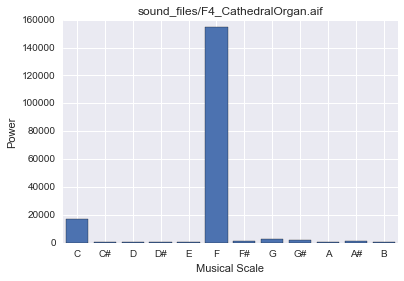

In [257]:
bins, note, Y = freq_to_notes(freq, power)
histogram_plot(bins, Y)
plt.title(filename)
print("The estimated note that was played: " , " ".join(note_played(note, Y)))

#### Complete task 2 by running on all files

In [241]:
name = os.path.splitext(os.path.split("sound_files/A4_PopOrgan.aif")[1])[0]
name

'A4_PopOrgan'

In [258]:
for filename in sound_files:
    #print(filename)
    if filename == "sound_files/.DS_Store":
        continue
    # To illustrate what the program is doing, we will save images based on the names
    name = os.path.splitext(os.path.split(filename)[1])[0]
    #print(name)
    data, rate = load(filename)
    freq, power = time_to_freq_pow(data, rate)
    bins, note, Y = freq_to_notes(freq, power)
    histogram_plot(bins, Y)
    plt.title(filename)
    print(filename, "The estimated note that was played: " , " ".join(note_played(note, Y)))
    plt.title(name + str(note_tmp))
    plt.savefig("note_result/%s.png" % name)
    plt.close('all')
    
    #print(filename); print("The identified file was: %s",  note_played(bins, Y))

/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kevinli/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kevinli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


sound_files/1.aif The estimated note that was played:  C4
sound_files/10.aif The estimated note that was played:  C2
sound_files/11.aif The estimated note that was played:  E2
sound_files/12.aif The estimated note that was played:  C2
sound_files/2.aif The estimated note that was played:  F4 F5
sound_files/3.aif The estimated note that was played:  E6
sound_files/4.aif The estimated note that was played:  C4
sound_files/5.aif The estimated note that was played:  G2
sound_files/6.aif The estimated note that was played:  G6
sound_files/7.aif The estimated note that was played:  A6
sound_files/8.aif The estimated note that was played:  F4
sound_files/9.aif The estimated note that was played:  G3 G4
sound_files/A4_PopOrgan.aif The estimated note that was played:  A4
sound_files/C4+A4_PopOrgan.aif The estimated note that was played:  C4
sound_files/F3_PopOrgan.aif The estimated note that was played:  F3 F4 C5 F5
sound_files/F4_CathedralOrgan.aif The estimated note that was played:  F4 F5
